In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./df_분리/건물_30년 초과.csv')
df.drop('건물연식',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

# OLS - Scaling 후

## R_OLS_1

In [3]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53746
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:01:59                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0119      0.030    165.776      0.000       4.953       5.071
건물면적(㎡)               1.7775      0.010    178.373      0.000       1.758       1.797
층                     0.0458      0.007      6.900      0.000       0.033       0.059
KOSPI종가              -0.0787      0.024     -3.332      0.001      -0.125      -0.032
Fed기준금리              -0.2254      0.014    -15.730      0.000      -0.253      -0.197
국제유가(Dubai)($/배럴)     0.1910      0.014     13.343      0.000       0.163       0.219
부동산거래량               -0.0066      0.007     -0.929      0.353      -0.020       0.007
국고채5년(평균)            -0.6318      0.073     -8.668      0.000      -0.775      -0.489
국고채10년(평균)            0.6319      0.056     11.251      0.000       0.522       0.742
회사채3년(평균)             0.1609      0.020      7.864      0.000       0.121       0.201
CD91물(평균)            -0.1960      0.031     -6.362      0.000      -0.256      -0.136
BOK기준금리              -0.0622      0.026     -2.409      0.016      -0.113      -0.012
GDP대비가계부채비율          -0.3204      0.023    -14.155      0.000      -0.365      -0.276
환율종가                  0.0402      0.012      3.285      0.001       0.016       0.064
선행지수순환변동치             0.2513      0.017     14.648      0.000       0.218       0.285
EPU                  -0.0531      0.008     -6.495      0.000      -0.069      -0.037
장단기금리spread          -0.3916      0.033    -12.013      0.000      -0.455      -0.328
금값종가                 -0.0318      0.022     -1.416      0.157      -0.076       0.012
LTV                  -0.4375      0.007    -61.738      0.000      -0.451      -0.424
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 부동산거래량 컬럼 삭제

In [4]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

## R_OLS_2

In [5]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53747
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:02:21                                         
No. Iterations:                    21                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0142      0.030    166.227      0.000       4.955       5.073
건물면적(㎡)               1.7774      0.010    178.377      0.000       1.758       1.797
층                     0.0459      0.007      6.905      0.000       0.033       0.059
KOSPI종가              -0.0840      0.023     -3.655      0.000      -0.129      -0.039
Fed기준금리              -0.2244      0.014    -15.692      0.000      -0.252      -0.196
국제유가(Dubai)($/배럴)     0.1880      0.014     13.454      0.000       0.161       0.215
국고채5년(평균)            -0.6301      0.073     -8.647      0.000      -0.773      -0.487
국고채10년(평균)            0.6341      0.056     11.300      0.000       0.524       0.744
회사채3년(평균)             0.1660      0.020      8.388      0.000       0.127       0.205
CD91물(평균)            -0.1998      0.031     -6.537      0.000      -0.260      -0.140
BOK기준금리              -0.0596      0.026     -2.325      0.020      -0.110      -0.009
GDP대비가계부채비율          -0.3231      0.023    -14.360      0.000      -0.367      -0.279
환율종가                  0.0382      0.012      3.163      0.002       0.015       0.062
선행지수순환변동치             0.2543      0.017     15.068      0.000       0.221       0.287
EPU                  -0.0506      0.008     -6.525      0.000      -0.066      -0.035
장단기금리spread          -0.3993      0.032    -12.622      0.000      -0.461      -0.337
금값종가                 -0.0296      0.022     -1.324      0.185      -0.073       0.014
LTV                  -0.4392      0.007    -63.723      0.000      -0.453      -0.426
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 금값종가 컬럼 삭제

In [6]:
X_scaled.drop('금값종가', axis=1, inplace=True)

## R_OLS_3

In [7]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53748
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:02:36                                         
No. Iterations:                    18                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0034      0.029    172.614      0.000       4.947       5.060
건물면적(㎡)               1.7776      0.010    178.408      0.000       1.758       1.797
층                     0.0458      0.007      6.895      0.000       0.033       0.059
KOSPI종가              -0.0904      0.022     -4.029      0.000      -0.134      -0.046
Fed기준금리              -0.2187      0.014    -16.023      0.000      -0.245      -0.192
국제유가(Dubai)($/배럴)     0.1898      0.014     13.692      0.000       0.163       0.217
국고채5년(평균)            -0.6569      0.070     -9.402      0.000      -0.794      -0.520
국고채10년(평균)            0.6556      0.054     12.227      0.000       0.551       0.761
회사채3년(평균)             0.1682      0.020      8.525      0.000       0.129       0.207
CD91물(평균)            -0.1916      0.030     -6.394      0.000      -0.250      -0.133
BOK기준금리              -0.0594      0.026     -2.320      0.020      -0.110      -0.009
GDP대비가계부채비율          -0.3412      0.018    -19.094      0.000      -0.376      -0.306
환율종가                  0.0374      0.012      3.098      0.002       0.014       0.061
선행지수순환변동치             0.2571      0.017     15.359      0.000       0.224       0.290
EPU                  -0.0491      0.008     -6.376      0.000      -0.064      -0.034
장단기금리spread          -0.3937      0.031    -12.562      0.000      -0.455      -0.332
LTV                  -0.4400      0.007    -64.082      0.000      -0.453      -0.427
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

## VIF_3

In [9]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.589557            건물면적(㎡)
1     4.533736                  층
2   119.448903            KOSPI종가
3    51.843654            Fed기준금리
4    65.418674  국제유가(Dubai)($/배럴)
5   951.217421          국고채5년(평균)
6   699.966329         국고채10년(평균)
7    93.283548          회사채3년(평균)
8   234.760389          CD91물(평균)
9   226.668070            BOK기준금리
10   65.980089        GDP대비가계부채비율
11   29.395242               환율종가
12   93.348477          선행지수순환변동치
13    5.434159                EPU
14  164.956898        장단기금리spread
15   17.127632                LTV


### 국고채5년(평균) 컬럼 삭제

In [10]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

## R_OLS_4

In [11]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53749
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:03:33                                         
No. Iterations:                    20                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1137      0.027    192.797      0.000       5.062       5.166
건물면적(㎡)               1.7809      0.010    178.534      0.000       1.761       1.800
층                     0.0456      0.007      6.863      0.000       0.033       0.059
KOSPI종가              -0.0978      0.022     -4.360      0.000      -0.142      -0.054
Fed기준금리              -0.2538      0.013    -19.264      0.000      -0.280      -0.228
국제유가(Dubai)($/배럴)     0.2023      0.014     14.612      0.000       0.175       0.229
국고채10년(평균)            0.2519      0.032      7.796      0.000       0.189       0.315
회사채3년(평균)             0.1236      0.019      6.460      0.000       0.086       0.161
CD91물(평균)            -0.2850      0.028    -10.031      0.000      -0.341      -0.229
BOK기준금리              -0.1656      0.023     -7.189      0.000      -0.211      -0.120
GDP대비가계부채비율          -0.3225      0.018    -18.186      0.000      -0.357      -0.288
환율종가                  0.0803      0.011      7.144      0.000       0.058       0.102
선행지수순환변동치             0.2860      0.016     17.387      0.000       0.254       0.318
EPU                  -0.0642      0.008     -8.527      0.000      -0.079      -0.049
장단기금리spread          -0.5868      0.024    -24.621      0.000      -0.634      -0.540
LTV                  -0.4310      0.007    -63.277      0.000      -0.444      -0.418
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_4

In [12]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.524690            건물면적(㎡)
1     4.533503                  층
2   117.400429            KOSPI종가
3    44.180620            Fed기준금리
4    65.261628  국제유가(Dubai)($/배럴)
5   203.004512         국고채10년(평균)
6    88.115438          회사채3년(평균)
7   232.213593          CD91물(평균)
8   202.324432            BOK기준금리
9    57.367419        GDP대비가계부채비율
10   20.726293               환율종가
11   88.871805          선행지수순환변동치
12    5.383878                EPU
13  113.805462        장단기금리spread
14   15.268245                LTV


### CD91물(평균) 컬럼 삭제

In [13]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## R_OLS_5

In [14]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53750
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:04:06                                         
No. Iterations:                    19                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9677      0.022    223.922      0.000       4.924       5.011
건물면적(㎡)               1.7836      0.010    178.781      0.000       1.764       1.803
층                     0.0449      0.007      6.742      0.000       0.032       0.058
KOSPI종가              -0.0341      0.021     -1.586      0.113      -0.076       0.008
Fed기준금리              -0.2805      0.013    -21.657      0.000      -0.306      -0.255
국제유가(Dubai)($/배럴)     0.2024      0.014     14.605      0.000       0.175       0.230
국고채10년(평균)            0.0470      0.025      1.855      0.064      -0.003       0.097
회사채3년(평균)             0.1893      0.018     10.474      0.000       0.154       0.225
BOK기준금리              -0.2823      0.020    -14.250      0.000      -0.321      -0.243
GDP대비가계부채비율          -0.3115      0.018    -17.589      0.000      -0.346      -0.277
환율종가                  0.0946      0.011      8.471      0.000       0.073       0.117
선행지수순환변동치             0.3551      0.015     23.545      0.000       0.326       0.385
EPU                  -0.0520      0.007     -6.990      0.000      -0.067      -0.037
장단기금리spread          -0.5298      0.023    -22.894      0.000      -0.575      -0.484
LTV                  -0.4298      0.007    -63.091      0.000      -0.443      -0.416
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### KOSPI종가 컬럼 삭제

In [15]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

## R_OLS_6

In [16]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53751
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:04:32                                         
No. Iterations:                    28                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9564      0.021    236.461      0.000       4.915       4.998
건물면적(㎡)               1.7843      0.010    178.911      0.000       1.765       1.804
층                     0.0449      0.007      6.740      0.000       0.032       0.058
Fed기준금리              -0.2791      0.013    -21.589      0.000      -0.304      -0.254
국제유가(Dubai)($/배럴)     0.1984      0.014     14.500      0.000       0.172       0.225
국고채10년(평균)            0.0565      0.025      2.289      0.022       0.008       0.105
회사채3년(평균)             0.1785      0.017     10.639      0.000       0.146       0.211
BOK기준금리              -0.2833      0.020    -14.306      0.000      -0.322      -0.244
GDP대비가계부채비율          -0.3192      0.017    -18.738      0.000      -0.353      -0.286
환율종가                  0.1004      0.011      9.504      0.000       0.080       0.121
선행지수순환변동치             0.3395      0.011     29.670      0.000       0.317       0.362
EPU                  -0.0501      0.007     -6.822      0.000      -0.065      -0.036
장단기금리spread          -0.5236      0.023    -22.969      0.000      -0.568      -0.479
LTV                  -0.4278      0.007    -64.061      0.000      -0.441      -0.415
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_6

In [17]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.456164            건물면적(㎡)
1     4.521870                  층
2    42.859491            Fed기준금리
3    63.687506  국제유가(Dubai)($/배럴)
4   138.272141         국고채10년(평균)
5    66.249614          회사채3년(평균)
6    46.840604            BOK기준금리
7    33.465876        GDP대비가계부채비율
8    19.103924               환율종가
9    43.063053          선행지수순환변동치
10    5.329216                EPU
11  112.685788        장단기금리spread
12   13.967792                LTV


### 국고채10년(평균) 컬럼 삭제

In [18]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

## R_OLS_7

In [19]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53752
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:05:03                                         
No. Iterations:                    25                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9442      0.020    244.536      0.000       4.905       4.984
건물면적(㎡)               1.7839      0.010    178.878      0.000       1.764       1.803
층                     0.0448      0.007      6.725      0.000       0.032       0.058
Fed기준금리              -0.2697      0.012    -21.918      0.000      -0.294      -0.246
국제유가(Dubai)($/배럴)     0.1958      0.014     14.334      0.000       0.169       0.223
회사채3년(평균)             0.2022      0.013     15.347      0.000       0.176       0.228
BOK기준금리              -0.2702      0.019    -14.242      0.000      -0.307      -0.233
GDP대비가계부채비율          -0.3298      0.016    -20.162      0.000      -0.362      -0.298
환율종가                  0.1039      0.010      9.974      0.000       0.084       0.124
선행지수순환변동치             0.3527      0.010     35.431      0.000       0.333       0.372
EPU                  -0.0481      0.007     -6.584      0.000      -0.062      -0.034
장단기금리spread          -0.5022      0.021    -24.216      0.000      -0.543      -0.462
LTV                  -0.4263      0.007    -64.146      0.000      -0.439      -0.413
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### VIF_7

In [20]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.426474            건물면적(㎡)
1     4.519525                  층
2    34.827797            Fed기준금리
3    63.473026  국제유가(Dubai)($/배럴)
4    34.718271          회사채3년(평균)
5    46.117818            BOK기준금리
6    16.271789        GDP대비가계부채비율
7    19.059099               환율종가
8    32.804633          선행지수순환변동치
9     5.300936                EPU
10   99.811584        장단기금리spread
11   13.944510                LTV


### 장단기금리spread 컬럼 삭제

In [21]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

## R_OLS_8

In [22]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53753
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:05:40                                         
No. Iterations:                    18                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7243      0.018    261.363      0.000       4.689       4.760
건물면적(㎡)               1.8006      0.010    179.825      0.000       1.781       1.820
층                     0.0431      0.007      6.439      0.000       0.030       0.056
Fed기준금리              -0.2687      0.012    -21.702      0.000      -0.293      -0.244
국제유가(Dubai)($/배럴)     0.0763      0.013      5.972      0.000       0.051       0.101
회사채3년(평균)            -0.0801      0.006    -12.894      0.000      -0.092      -0.068
BOK기준금리              -0.0071      0.016     -0.456      0.649      -0.038       0.024
GDP대비가계부채비율          -0.1606      0.015    -10.825      0.000      -0.190      -0.132
환율종가                  0.0700      0.010      6.717      0.000       0.050       0.090
선행지수순환변동치             0.1927      0.007     25.718      0.000       0.178       0.207
EPU                  -0.0354      0.007     -4.825      0.000      -0.050      -0.021
LTV                  -0.3974      0.007    -60.679      0.000      -0.410      -0.385
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### BOK기준금리 컬럼 삭제

In [23]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

## R_OLS_9

In [24]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53754
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:05:59                                         
No. Iterations:                    21                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7179      0.011    417.235      0.000       4.696       4.740
건물면적(㎡)               1.8009      0.010    180.152      0.000       1.781       1.820
층                     0.0432      0.007      6.450      0.000       0.030       0.056
Fed기준금리              -0.2729      0.008    -32.118      0.000      -0.290      -0.256
국제유가(Dubai)($/배럴)     0.0764      0.013      5.988      0.000       0.051       0.101
회사채3년(평균)            -0.0800      0.006    -12.897      0.000      -0.092      -0.068
GDP대비가계부채비율          -0.1548      0.007    -20.916      0.000      -0.169      -0.140
환율종가                  0.0713      0.010      7.100      0.000       0.052       0.091
선행지수순환변동치             0.1936      0.007     26.858      0.000       0.179       0.208
EPU                  -0.0351      0.007     -4.803      0.000      -0.049      -0.021
LTV                  -0.3970      0.006    -61.419      0.000      -0.410      -0.384
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_9

In [25]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor            Feature
0    5.169694            건물면적(㎡)
1    4.482138                  층
2   20.184097            Fed기준금리
3   48.247056  국제유가(Dubai)($/배럴)
4    9.138850          회사채3년(평균)
5    9.865650        GDP대비가계부채비율
6   14.284610               환율종가
7   15.525152          선행지수순환변동치
8    5.287848                EPU
9   12.262136                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [26]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

## R_OLS_10

In [27]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53755
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:06:34                                         
No. Iterations:                    21                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7415      0.011    446.341      0.000       4.721       4.762
건물면적(㎡)         1.8032      0.010    180.392      0.000       1.784       1.823
층               0.0431      0.007      6.427      0.000       0.030       0.056
Fed기준금리        -0.2333      0.005    -43.642      0.000      -0.244      -0.223
회사채3년(평균)      -0.0698      0.006    -11.715      0.000      -0.081      -0.058
GDP대비가계부채비율    -0.1450      0.007    -20.082      0.000      -0.159      -0.131
환율종가            0.0469      0.009      5.093      0.000       0.029       0.065
선행지수순환변동치       0.1918      0.007     26.614      0.000       0.178       0.206
EPU            -0.0273      0.007     -3.792      0.000      -0.041      -0.013
LTV            -0.3933      0.006    -61.104      0.000      -0.406      -0.381
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_10

In [28]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    5.039915      건물면적(㎡)
1    4.475609            층
2    4.564013      Fed기준금리
3    8.284143    회사채3년(평균)
4    7.449231  GDP대비가계부채비율
5   13.294197         환율종가
6   15.449556    선행지수순환변동치
7    4.961866          EPU
8   10.742910          LTV


### 선행지수순환변동치 컬럼 삭제

In [29]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

## R_OLS_11

In [30]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53756
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:07:10                                         
No. Iterations:                    19                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8263      0.010    472.921      0.000       4.806       4.846
건물면적(㎡)         1.8353      0.010    183.252      0.000       1.816       1.855
층               0.0455      0.007      6.741      0.000       0.032       0.059
Fed기준금리        -0.2284      0.005    -42.434      0.000      -0.239      -0.218
회사채3년(평균)      -0.0022      0.005     -0.400      0.689      -0.013       0.008
GDP대비가계부채비율    -0.1392      0.007    -19.143      0.000      -0.153      -0.125
환율종가           -0.1056      0.007    -14.208      0.000      -0.120      -0.091
EPU            -0.0358      0.007     -4.946      0.000      -0.050      -0.022
LTV            -0.3231      0.006    -54.590      0.000      -0.335      -0.311
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 회사채3년(평균) 컬럼 삭제

In [31]:
X_scaled.drop('회사채3년(평균)', axis=1, inplace=True)

## R_OLS_12

In [32]:
# R_OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                53765
Model:                            RLM   Df Residuals:                    53757
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        16:07:30                                         
No. Iterations:                    20                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8250      0.010    495.533      0.000       4.806       4.844
건물면적(㎡)         1.8353      0.010    183.282      0.000       1.816       1.855
층               0.0455      0.007      6.740      0.000       0.032       0.059
Fed기준금리        -0.2287      0.005    -43.213      0.000      -0.239      -0.218
GDP대비가계부채비율    -0.1397      0.007    -19.606      0.000      -0.154      -0.126
환율종가           -0.1044      0.007    -15.498      0.000      -0.118      -0.091
EPU            -0.0347      0.007     -5.124      0.000      -0.048      -0.021
LTV            -0.3232      0.006    -54.709      0.000      -0.335      -0.312
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_12

In [33]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    4.656687      건물면적(㎡)
1    4.459104            층
2    2.762913      Fed기준금리
3    4.531910  GDP대비가계부채비율
4    8.315581         환율종가
5    4.483135          EPU
6    2.738823          LTV


### R_OLS 결과
 - 건물면적(㎡),층,Fed기준금리,GDP대비가계부채비율,환율종가,EPU,LTV

In [36]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'AppleGothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


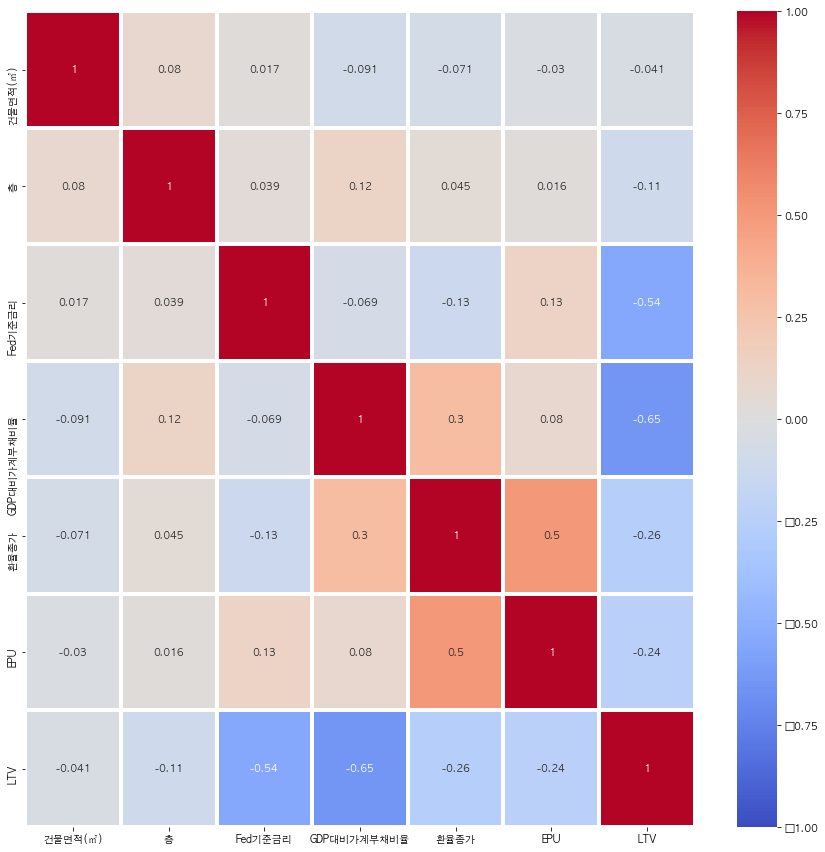

In [37]:
plot_cor(X_scaled)

# LinearRegression

## CV - R2, MSE

In [38]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [39]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.49765,           Validation Score_r2 = 0.25147
      Train Score_mse = 0.05151,           Validation Score_mse = 0.06147


Fold 2: Train Score_r2 = 0.49349,           Validation Score_r2 = 0.31519
      Train Score_mse = 0.05172,           Validation Score_mse = 0.05884


Fold 3: Train Score_r2 = 0.48689,           Validation Score_r2 = 0.36833
      Train Score_mse = 0.04874,           Validation Score_mse = 0.07246


Fold 4: Train Score_r2 = 0.45847,           Validation Score_r2 = 0.49631
      Train Score_mse = 0.05311,           Validation Score_mse = 0.05162


Fold 5: Train Score_r2 = 0.4171,           Validation Score_r2 = 0.54609
      Train Score_mse = 0.05653,           Validation Score_mse = 0.04809


CV 평균 R2 : 0.3955
CV 평균 MSE : 0.0585


## 평가지표 train and test 시각화

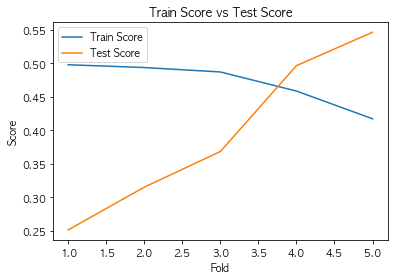

In [40]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

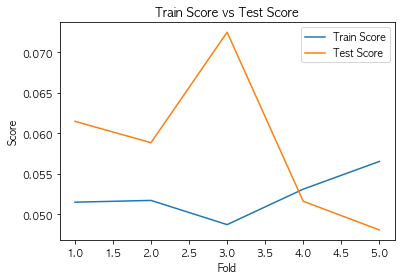

In [41]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

## Model 확정

- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 네 번째로 확정

In [42]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.060, RMSE :  0.246, MAE: 0.246
Variance score :  0.395




In [43]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][3].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
건물면적(㎡),1.754770
층,0.051548
EPU,-0.034870
환율종가,-0.107798
GDP대비가계부채비율,-0.130066
Fed기준금리,-0.219072
LTV,-0.312535


# Ridge & Lasso

## Ridge

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


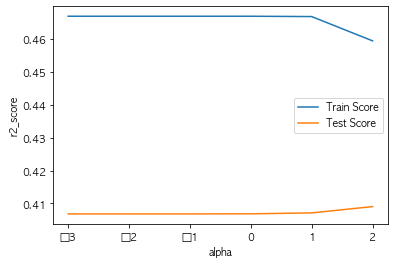

In [44]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- alpha 값이 변해도 큰 차이가 없어 기본값 alpha = 1.0으로 진행

## CV

In [45]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.49765,           Validation Score_r2 = 0.25221
      Train Score_mse = 0.05151,           Validation Score_mse = 0.06141


Fold 2: Train Score_r2 = 0.49349,           Validation Score_r2 = 0.31526
      Train Score_mse = 0.05172,           Validation Score_mse = 0.05884


Fold 3: Train Score_r2 = 0.48689,           Validation Score_r2 = 0.36794
      Train Score_mse = 0.04874,           Validation Score_mse = 0.0725


Fold 4: Train Score_r2 = 0.45847,           Validation Score_r2 = 0.49609
      Train Score_mse = 0.05311,           Validation Score_mse = 0.05164


Fold 5: Train Score_r2 = 0.4171,           Validation Score_r2 = 0.54585
      Train Score_mse = 0.05653,           Validation Score_mse = 0.04811


CV 평균 R2 : 0.3955
CV 평균 MSE : 0.0585


## 평가지표 train and test 차이 시각화

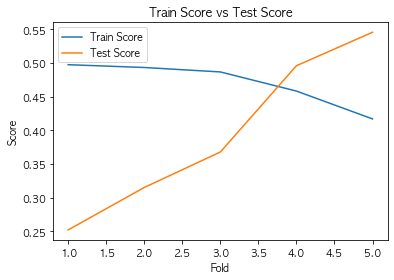

In [46]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [47]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.46690574968639975
0.4068575095095429


In [48]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.059, RMSE :  0.243, MAE: 0.243
Variance score :  0.407




In [49]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.060, RMSE :  0.245, MAE: 0.245
Variance score :  0.395




In [50]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][3].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),1.751259
층,0.051750
EPU,-0.034885
환율종가,-0.107797
GDP대비가계부채비율,-0.130146
Fed기준금리,-0.218996
LTV,-0.312540


In [51]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.14875893655973016


In [52]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True])

# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [43]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

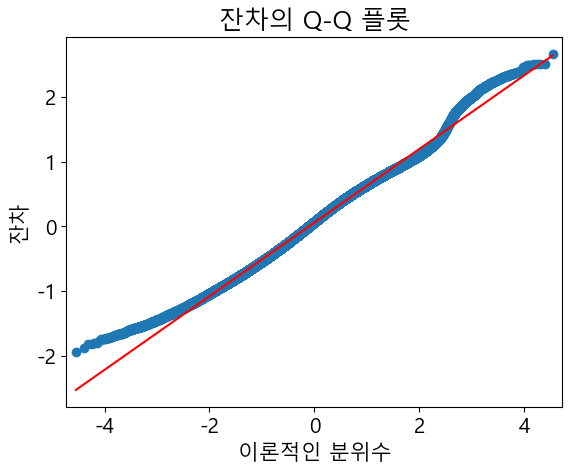

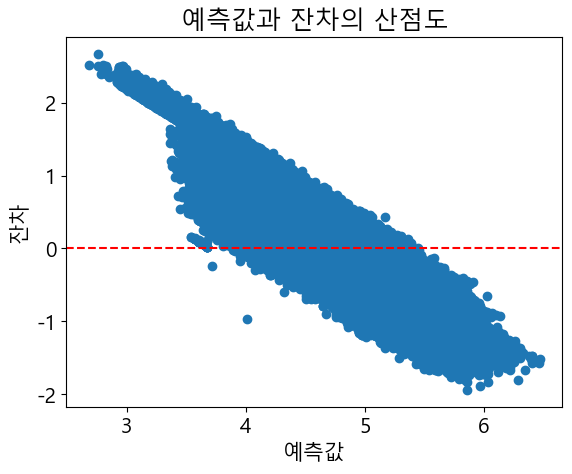

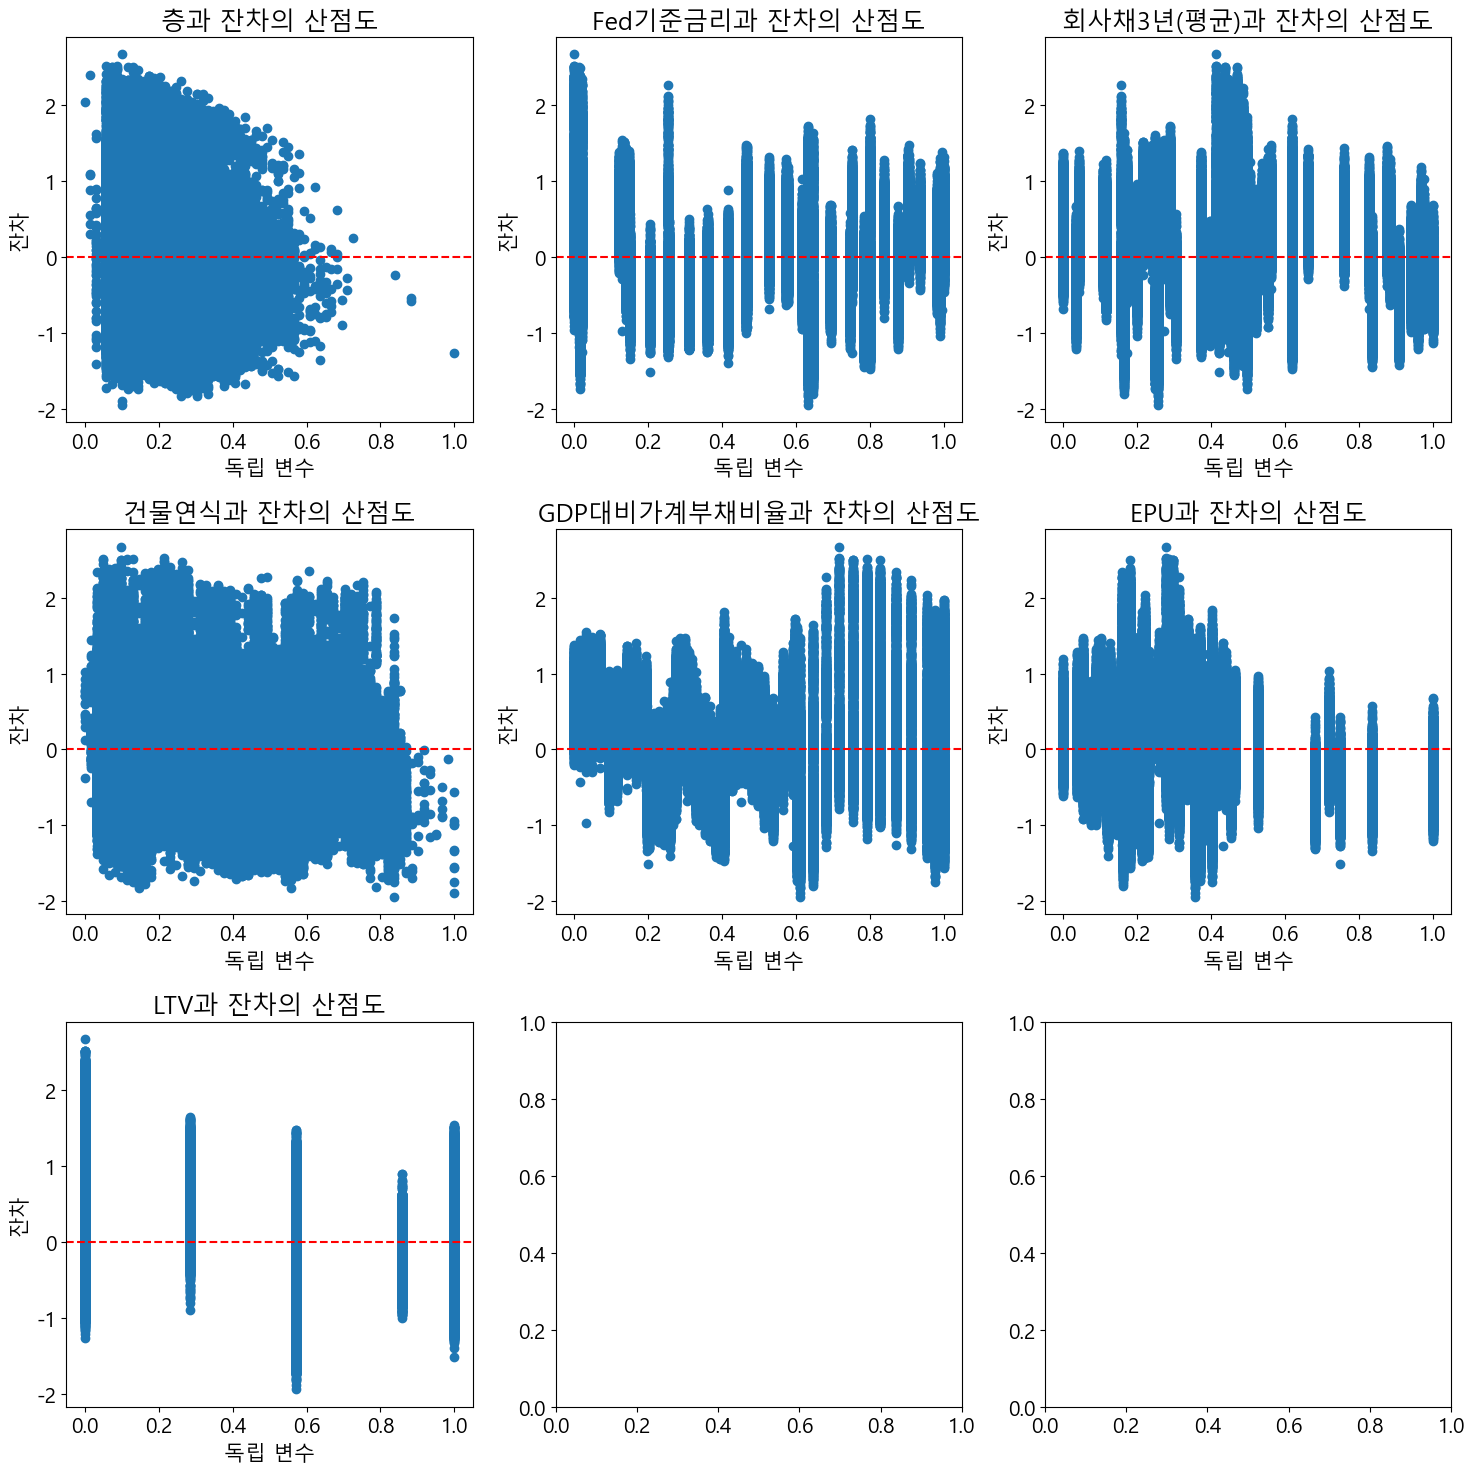

In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()